In [1]:
# SETUP
## Importing libs
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

## Random params
np.random.seed(0)
random_state = 338

## Plot params
%matplotlib inline
np.random.seed(0)
plt.rcParams['figure.figsize'] = [20, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower
sns.set_theme(context="notebook")

## Load train and test
test = pd.read_csv('../test.csv', index_col='id')
dT = pd.read_csv('../train.csv', index_col='id')

scl = MinMaxScaler()
scl.fit_transform(dT)
scld_dT = pd.DataFrame(scl.transform(dT))
scld_dT.index = dT.index
scld_dT.columns = dT.columns

stats = dT.describe()
statsTarget = stats.pop('claim')
stats = stats.transpose()

scld_stats = scld_dT.describe()
scld_stats = scld_stats.transpose()

C:\Users\alexa\AppData\Local\Programs\Python\Python38\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


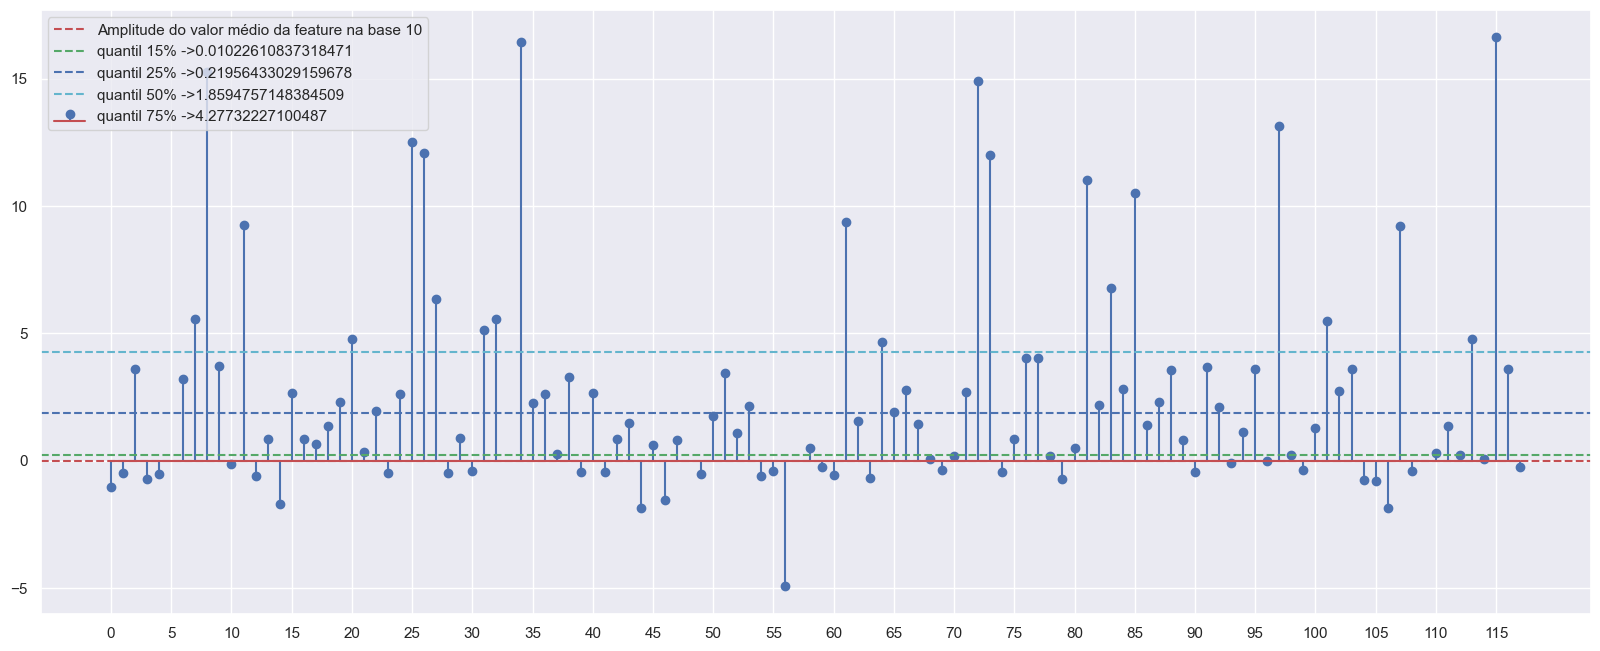

In [2]:
# Qual a escala de cada feature?
plt.stem(np.log10(stats['mean']));
plt.xticks(np.arange(0,len(stats['mean']),5));
amplitude = pd.DataFrame(np.log10(stats['max']))
q = amplitude.quantile([0.15,0.25,0.5,0.75])


plt.axhline(y = q.iloc[0].values[0],linestyle = '--',color ='r')
plt.axhline(y = q.iloc[1].values[0],linestyle = '--',color ='g')
plt.axhline(y = q.iloc[2].values[0],linestyle = '--',color ='b')
plt.axhline(y = q.iloc[3].values[0],linestyle = '--',color = 'c')

l1 = 'quantil 15% ->' +str(q.iloc[0].values[0])
l2 = 'quantil 25% ->' +str(q.iloc[1].values[0])
l3 = 'quantil 50% ->' +str(q.iloc[2].values[0])
l4 = 'quantil 75% ->' +str(q.iloc[3].values[0])

plt.legend(['Amplitude do valor médio da feature na base 10',l1,l2,l3,l4])


# plt.xticks(np.arange(len(stats['mean'])),stats.index);

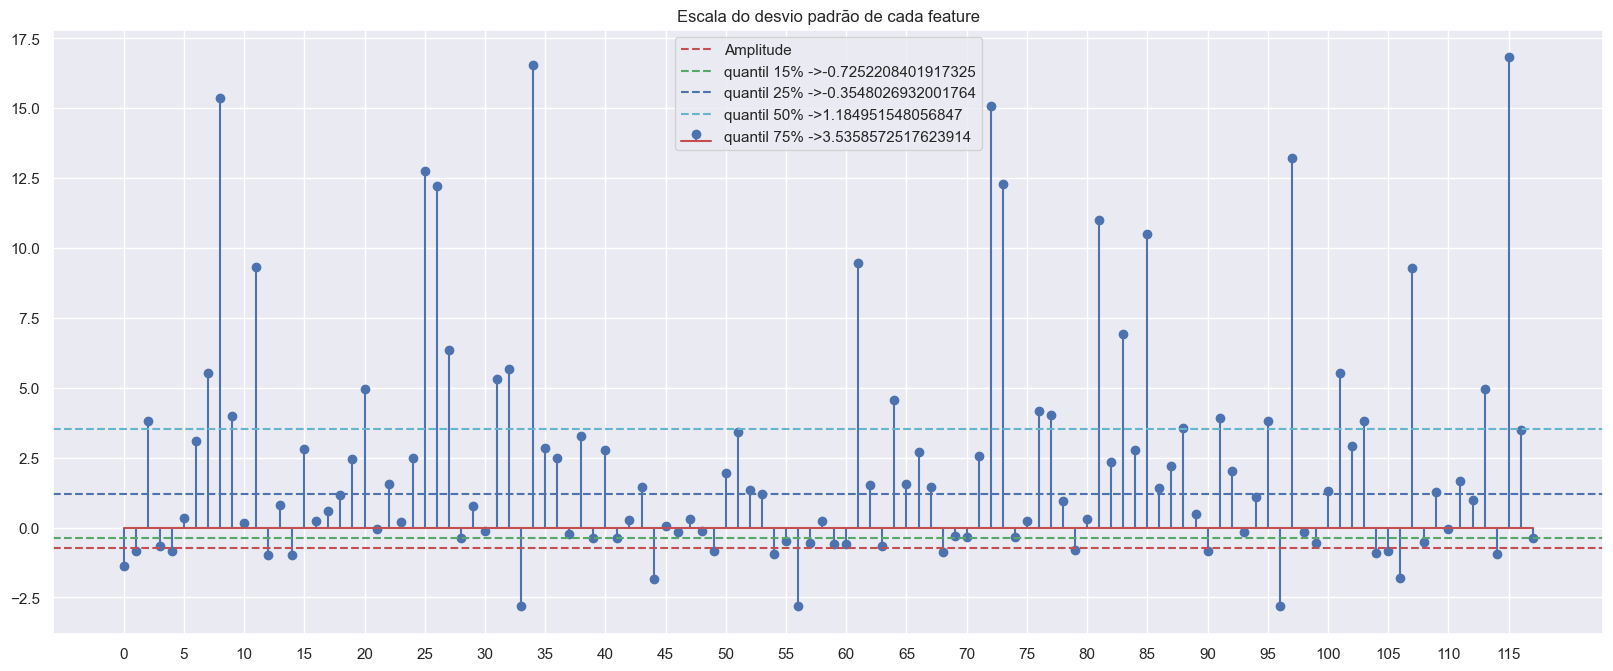

In [5]:
# Qual a escala do desvio padrão de cada feature?
plt.stem(np.log10(stats['std']));
plt.xticks(np.arange(0,len(stats['std']),5));
amplitude = pd.DataFrame(np.log10(stats['std']))
q = amplitude.quantile([0.15,0.25,0.5,0.75])


plt.axhline(y = q.iloc[0].values[0],linestyle = '--',color ='r');
plt.axhline(y = q.iloc[1].values[0],linestyle = '--',color ='g');
plt.axhline(y = q.iloc[2].values[0],linestyle = '--',color ='b');
plt.axhline(y = q.iloc[3].values[0],linestyle = '--',color = 'c');

l1 = 'quantil 15% ->' +str(q.iloc[0].values[0])
l2 = 'quantil 25% ->' +str(q.iloc[1].values[0])
l3 = 'quantil 50% ->' +str(q.iloc[2].values[0])
l4 = 'quantil 75% ->' +str(q.iloc[3].values[0])

plt.legend(['Amplitude',l1,l2,l3,l4]);
plt.title('Escala do desvio padrão de cada feature');


# plt.xticks(np.arange(len(stats['mean'])),stats.index);

In [6]:
# Há features constantes?
# plt.stem(np.log10(stats['std']));
# plt.xticks(np.arange(0,len(stats['std']),5));
# np.log10(stats['std'])
# (stats['std']/np.log10(stats['std'])).describe()
stats['std_amp'] = np.log10(stats['std'])

stats.loc[stats['std_amp'] <= 0]

# print('\n Regular:')
# print(stats['std'].describe())
# print('\n Scaled:')
# print(scld_stats['std'].describe())

,count,mean,std,min,25%,50%,75%,max,std_amp
f1,942672.0,0.090201,0.043564,-0.149910,0.070227,0.090135,0.116500,0.415170,-1.360875
f2,942729.0,0.345964,0.146251,-0.019044,0.283050,0.389100,0.458450,0.518990,-0.834902
f4,942359.0,0.201214,0.212510,-0.082122,0.035086,0.137000,0.297100,1.319900,-0.672620
f5,942514.0,0.304869,0.145343,-0.006990,0.240520,0.327790,0.412830,0.554750,-0.837607
f13,942455.0,0.247759,0.101156,-0.103800,0.221880,0.276060,0.309840,0.589770,-0.995010
f15,942410.0,0.019394,0.101880,-0.335660,-0.035655,0.010509,0.066116,0.509630,-0.991910
f22,942641.0,2.269597,0.896001,-6.009400,1.861200,2.286800,2.691100,11.306000,-0.047691
f29,942504.0,0.329054,0.433861,-0.005659,0.001522,0.078630,0.899340,1.095800,-0.362649
f31,942241.0,0.394211,0.781932,-3.813500,-0.014588,0.656300,0.940020,3.753100,-0.106831
f34,942671.0,-0.000005,0.001534,-0.003881,-0.001176,-0.000009,0.001161,0.003919,-2.814148


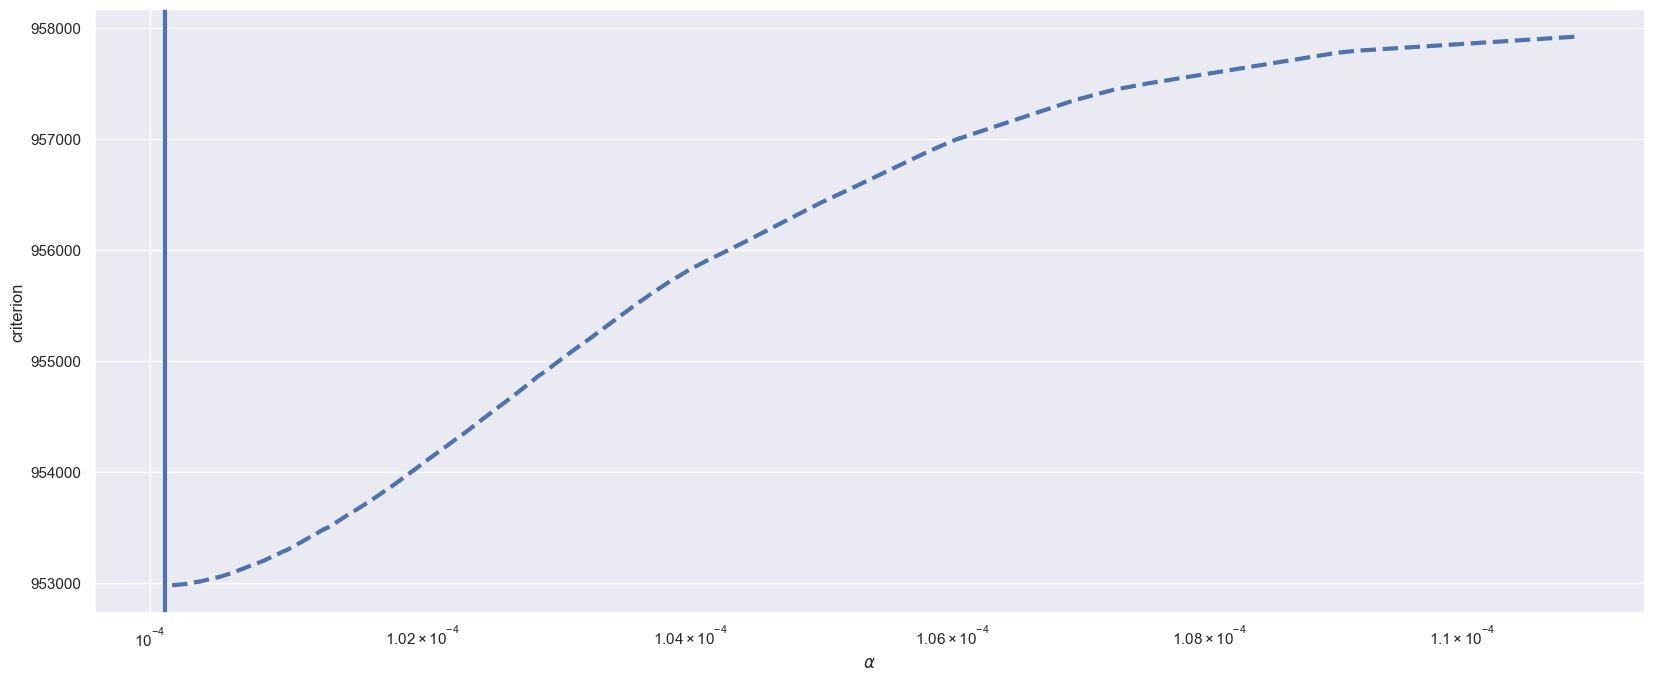

In [ ]:
from sklearn import linear_model
X = dT.copy()
y = X.pop('claim')

X= X.fillna(X.mean())

EPSILON = 1e-4
model_aic = linear_model.LassoLarsIC(criterion='aic')
model_aic.fit(X, y)
alpha_aic_ = model_aic.alpha_
def plot_ic_criterion(model, name, color):
    criterion_ = model.criterion_
    plt.semilogx(model.alphas_ + EPSILON, criterion_, '--', color=color,
                 linewidth=3, label='%s criterion' % name)
    plt.axvline(model.alpha_ + EPSILON, color=color, linewidth=3,
                label='alpha: %s estimate' % name)
    plt.xlabel(r'$\alpha$')
    plt.ylabel('criterion')


plt.figure()
plot_ic_criterion(model_aic, 'AIC', 'b')

In [ ]:
import time


t1 = time.time()
model = linear_model.LassoLarsCV(cv=20).fit(X, y)
t_lasso_lars_cv = time.time() - t1



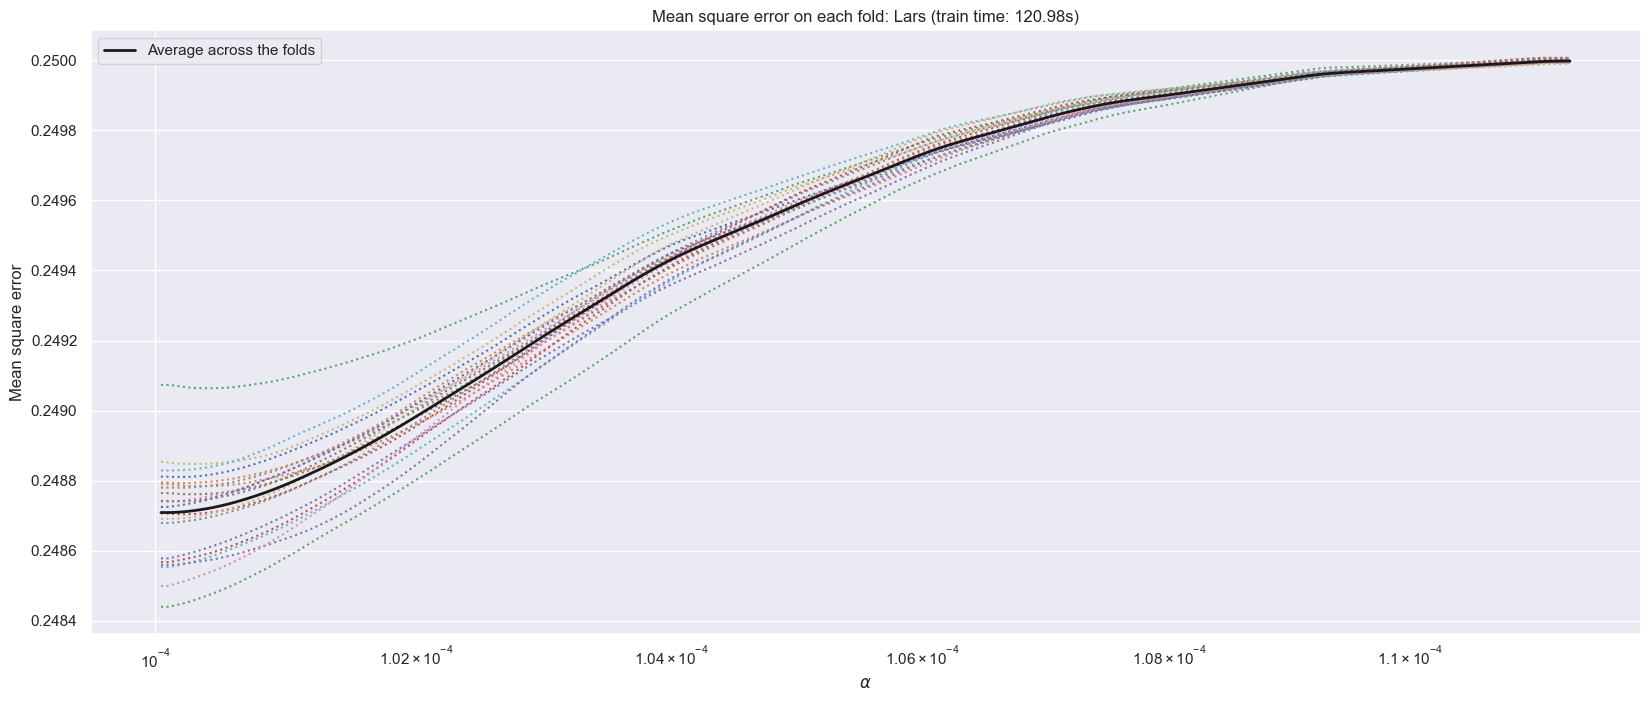

In [ ]:
# Display results
plt.figure()
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_, ':')
plt.semilogx(model.cv_alphas_ + EPSILON, model.mse_path_.mean(axis=-1), 'k',
             label='Average across the folds', linewidth=2)
# plt.axvline(model.alpha_, linestyle='--', color='k',
#             label='alpha CV')
plt.legend()

plt.xlabel(r'$\alpha$')
plt.ylabel('Mean square error')
plt.title('Mean square error on each fold: Lars (train time: %.2fs)'
          % t_lasso_lars_cv)
plt.axis('tight')
# plt.ylim(ymin, ymax)

plt.show()